In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
dataset = pd.read_csv(r'data_sets.csv')

In [3]:
dataset

,cgpa,score,placed
0,8.56,7.92,1
1,7.81,6.37,1
2,6.92,5.78,0
3,8.02,7.21,1
4,6.45,5.63,0
...,...,...,...
146,6.79,5.86,0
147,7.20,6.45,1
148,8.26,7.48,1
149,6.42,5.51,0


<Axes: xlabel='cgpa', ylabel='score'>

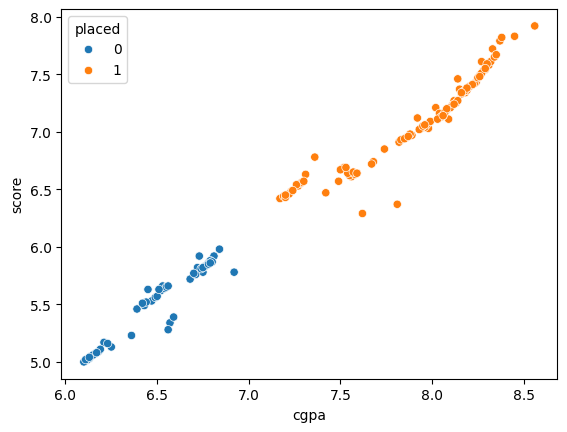

In [4]:
sns.scatterplot(x=dataset['cgpa'],y = dataset['score'],hue=dataset['placed'])

In [5]:
from sklearn.linear_model import Perceptron

In [6]:
pct = Perceptron()

In [7]:
X = dataset.iloc[:,:-1]

In [8]:
y = dataset.iloc[:,-1]

In [9]:
pct.fit(X,y)

Perceptron()

In [10]:
pct.coef_

array([[-28.29,  43.56]])

In [11]:
pct.intercept_

array([-50.])

In [12]:
from mlxtend.plotting import plot_decision_regions

C:\Users\shiva\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


<Axes: >

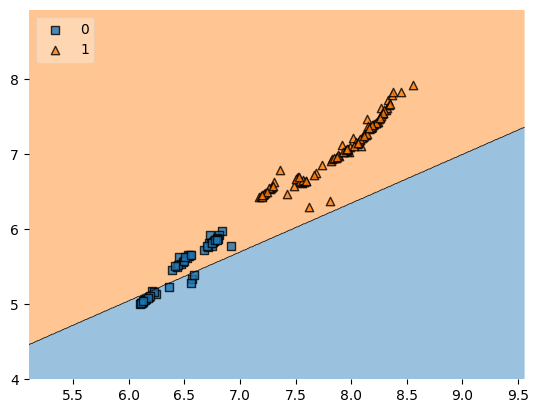

In [13]:
plot_decision_regions(X.values,y.values,clf=pct,legend=2)

## Neural Network for Placement Dataset

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
X_train = X_train/100
X_test = X_test/100

In [71]:
from tensorflow import keras

In [72]:
model = keras.Sequential([
    keras.layers.Dense(1, input_shape=(2,), activation='sigmoid',kernel_initializer='ones', bias_initializer='zeros')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

C:\Users\shiva\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [73]:
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6667 - loss: 0.6655 
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6667 - loss: 0.6650 
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6667 - loss: 0.6645
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6667 - loss: 0.6639 
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6667 - loss: 0.6635 
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6667 - loss: 0.6629 
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6667 - loss: 0.6625
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6667 - loss: 0.6619 
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6667 - loss: 0.6614 
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6667 - loss: 0.6609
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6667 - loss: 0.6605 
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6667 - lo

In [74]:
coef, intercept = model.get_weights()
coef, intercept

(array([[1.3154787],
        [1.3233695]], dtype=float32),
 array([0.27120492], dtype=float32))

In [75]:
def loss(y_true,y_predicted):
    epsilon = 1e-15
    y_predicted = [max(i, epsilon) for i in y_predicted]
    y_predicted = [min(i,1-epsilon) for i in y_predicted]
    y_predicted = np.array(y_predicted)
    return -np.mean(y_true * np.log(y_predicted)+(1-y_true)*np.log(1-y_predicted))

In [76]:
def sigmoid(x):
    return (1/(1+(np.exp(-x))))


In [77]:

def gradient_descent(cgpa,score,y_true,epochs):
    w1 = w2 = 1
    b = 0
    learning_rate = 0.5

    for i in range(epochs):
        fun = w1*cgpa + w2*score + b
        y_predicted = sigmoid(fun)
        log_loss = loss(y_true,y_predicted)

        w1 = w1 - learning_rate * ((1/len(cgpa)*(np.dot(np.transpose(cgpa),(y_predicted-y_true)))))
        w2 = w2 - learning_rate * ((1/len(cgpa)*(np.dot(np.transpose(score),(y_predicted-y_true)))))
        b = b - learning_rate *((np.mean(y_predicted-y_true)))
        
        print(f"epochs: {i}, loss: {log_loss}, weight1: {w1}, weight2: {w2}, bias: {b}")

        if(log_loss<=0.6308):
            break
    
    return log_loss, w1, w2 , b
    

In [78]:
gradient_descent(X_train['cgpa'],X_train['score'],y_train,500)

epochs: 0, loss: 0.6657512351240865, weight1: 1.006442986295575, weight2: 1.0060277762210232, bias: 0.0659347535059381
epochs: 1, loss: 0.657454940030604, weight1: 1.0122714177661982, weight2: 1.0115146373883774, bias: 0.12358208446978441
epochs: 2, loss: 0.6511017911001502, weight1: 1.0175657001188811, weight2: 1.016531360108998, bias: 0.17402596249971405
epochs: 3, loss: 0.646227006487523, weight1: 1.0223956654519426, weight2: 1.021139412170022, bias: 0.2182078957367805
epochs: 4, loss: 0.6424783587765915, weight1: 1.0268217363707521, weight2: 1.0253919778070972, bias: 0.2569425923928318
epochs: 5, loss: 0.6395890967210536, weight1: 1.0308961032332726, weight2: 1.0293349943647492, bias: 0.2909338087532473
epochs: 6, loss: 0.6373570592075233, weight1: 1.034663828510694, weight2: 1.0330081246757916, bias: 0.32078922172014146
epochs: 7, loss: 0.6356287921122877, weight1: 1.038163840261682, weight2: 1.0364456317430892, bias: 0.3470338116523328
epochs: 8, loss: 0.6342875662880495, weight1

(0.6306001517179881, 1.057501412219829, 1.055964511317309, 0.46111468392882826)

In [79]:
model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


array([[0.61806923],
       [0.6052813 ],
       [0.61613464],
       [0.61516666],
       [0.60313416],
       [0.6133531 ],
       [0.6126342 ],
       [0.61622834],
       [0.6157911 ],
       [0.61769503],
       [0.60745454],
       [0.6083355 ],
       [0.60805225],
       [0.6037977 ],
       [0.61388534],
       [0.6077374 ],
       [0.61257154],
       [0.60780036],
       [0.6074225 ],
       [0.6169464 ],
       [0.6187866 ],
       [0.61088   ],
       [0.61579144],
       [0.6127273 ],
       [0.6171335 ],
       [0.616728  ],
       [0.61141336],
       [0.6175079 ],
       [0.6030393 ],
       [0.6052465 ],
       [0.61529255]], dtype=float32)

In [80]:
y_test

76     1
18     0
82     1
81     1
143    0
31     1
78     1
64     1
55     1
85     1
45     0
12     0
36     0
9      0
19     1
137    0
114    1
146    0
56     0
133    1
29     1
84     1
26     1
132    1
124    1
142    1
111    1
67     1
98     0
30     0
22     1
Name: placed, dtype: int64

In [81]:
model.evaluate(X_test,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - accuracy: 0.6452 - loss: 0.6440


[0.6439995169639587, 0.6451612710952759]